In [1]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

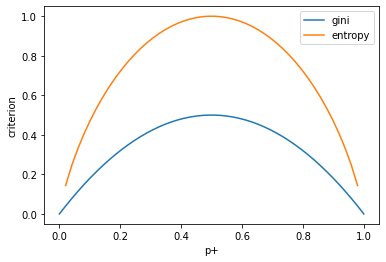

In [9]:
xx = np.linspace(0, 1, 50)
plt.plot(xx, [2 * x * (1 - x) for x in xx], label='gini')
plt.plot(xx, [-x * np.log2(x) - (1-x)*np.log2(1-x) for x in xx], label='entropy')
plt.ylabel('criterion')
plt.xlabel('p+')
plt.legend()

In [3]:
a = []
for i in range(5):
    a.append(i)

In [5]:
# list comprehenson
a = [i for i in range(5)]

In [14]:
# первый класс
np.random.seed(7)
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)

# добавляем второй класс
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]

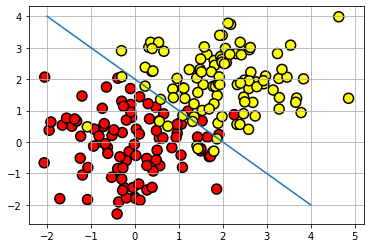

In [17]:
plt.scatter(
    train_data[:, 0],
    train_data[:, 1],
    c=train_labels,
    s=100, 
    cmap='autumn',
    edgecolors='black', 
    linewidth=1.5
);
plt.grid()
plt.plot(range(-2,5), range(4,-3,-1));

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
# Напишем вспомогательную функцию, которая будет возвращать решетку для дальнейшей визуализации.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

In [20]:
# параметр min_samples_leaf указывает, при каком минимальном количестве
# элементов в узле он будет дальше разделяться
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=17)

In [21]:
# обучаем дерево
clf_tree.fit(train_data, train_labels)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=17)

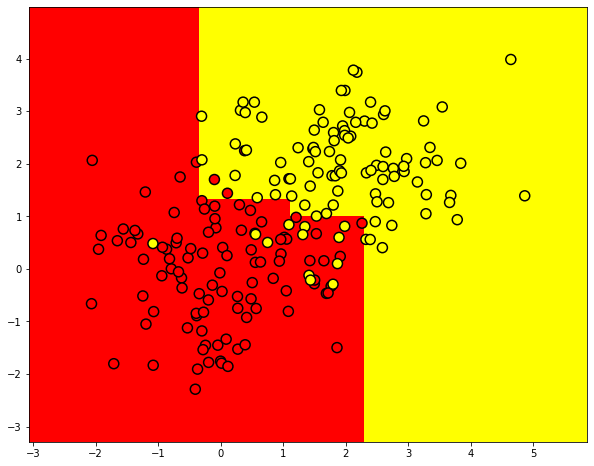

In [24]:
plt.figure(figsize=(10, 8))
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
cmap='autumn', edgecolors='black', linewidth=1.5);

In [25]:
!pip install pydotplus

In [26]:
import pydotplus  # pip install pydotplus
from sklearn.tree import export_graphviz


def tree_graph_to_png(tree, feature_names, png_file_to_save):
    """
    This requires GraphViz to be installed.  
    """
    
    tree_str = export_graphviz(
        tree, feature_names=feature_names, filled=True, out_file=None
    )
    graph = pydotplus.graph_from_dot_data(tree_str)
    graph.write_png(png_file_to_save)

In [27]:
tree_graph_to_png(
    tree=clf_tree,
    feature_names=["x1", "x2"],
    png_file_to_save="topic3_decision_tree1.png",
)

In [29]:
train_data

array([[ 1.69052570e+00, -4.65937371e-01],
       [ 3.28201637e-02,  4.07516283e-01],
       [-7.88923029e-01,  2.06557291e-03],
       [-8.90385858e-04, -1.75472431e+00],
       [ 1.01765801e+00,  6.00498516e-01],
       [-6.25428974e-01, -1.71548261e-01],
       [ 5.05299374e-01, -2.61356415e-01],
       [-2.42749079e-01, -1.45324141e+00],
       [ 5.54580312e-01,  1.23880905e-01],
       [ 2.74459924e-01, -1.52652453e+00],
       [ 1.65069969e+00,  1.54335535e-01],
       [-3.87139943e-01,  2.02907222e+00],
       [-4.53860299e-02, -1.45067870e+00],
       [-4.05227855e-01, -2.28831510e+00],
       [ 1.04939655e+00, -4.16474319e-01],
       [-7.42553525e-01,  1.07247013e+00],
       [-1.65107559e+00,  5.35429356e-01],
       [-2.06441480e+00, -6.62159340e-01],
       [-1.20421985e+00,  1.46197563e+00],
       [ 1.76616088e+00, -3.29413752e-01],
       [ 8.40733242e-01, -1.79986401e-01],
       [ 5.68061887e-01, -7.52837196e-01],
       [-1.70833920e+00, -1.80309866e+00],
       [ 3.

In [30]:
data = pd.DataFrame(
    {
        "Age": [17, 64, 18, 20, 38, 49, 55, 25, 29, 31, 33],
        "Loan Default": [1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1],
    }
)
data

,Age,Loan Default
0,17,1
1,64,0
2,18,1
3,20,0
4,38,1
5,49,0
6,55,0
7,25,1
8,29,1
9,31,0


In [31]:
data.sort_values("Age")

,Age,Loan Default
0,17,1
2,18,1
3,20,0
7,25,1
8,29,1
9,31,0
10,33,1
4,38,1
5,49,0
6,55,0


In [32]:
age_tree = DecisionTreeClassifier(random_state=17)
age_tree.fit(data["Age"].values.reshape(-1, 1), data["Loan Default"].values)

DecisionTreeClassifier(random_state=17)

In [33]:
tree_graph_to_png(
    age_tree,
    feature_names=["Age"],
    png_file_to_save="topic3_decision_tree2.png",
)

In [35]:
data2 = pd.DataFrame(
    {
        "Age": [17, 64, 18, 20, 38, 49, 55, 25, 29, 31, 33],
        "Salary": [25, 80, 22, 36, 37, 59, 74, 70, 33, 102, 88],
        "Loan Default": [1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1],
    }
)

In [36]:
data2

,Age,Salary,Loan Default
0,17,25,1
1,64,80,0
2,18,22,1
3,20,36,0
4,38,37,1
5,49,59,0
6,55,74,0
7,25,70,1
8,29,33,1
9,31,102,0


In [37]:
data2.sort_values("Age")

,Age,Salary,Loan Default
0,17,25,1
2,18,22,1
3,20,36,0
7,25,70,1
8,29,33,1
9,31,102,0
10,33,88,1
4,38,37,1
5,49,59,0
6,55,74,0


In [38]:
age_sal_tree = DecisionTreeClassifier(random_state=17)
age_sal_tree.fit(data2[["Age", "Salary"]].values, data2["Loan Default"].values);

In [39]:
tree_graph_to_png(
    tree=age_sal_tree,
    feature_names=["Age", "Salary"],
    png_file_to_save="topic3_decision_tree3.png",
)